# Final Project : Naruto Network Analysis

_Course:_ **02805 Social graphs and interactions** (DTU - Technical University of Denmark) <br>
Project members: **_Chao Yu (s200079), Caining Liu (s192146), Manxi Lin (s192230)_**

## Instruction
In this notebook, we used different format to discriminate **questions** and our **answers**. It goes like:  
- **Questions**
> **Answers** or **Figure Comments**

NB: The manga series ***Naruto*** has the same name as its hero, Naruto Uzumaki. To avoid confusion, we would use *Naruto* or ***Naruto*** to represent the book and Naruto to stand for the ninja. We would use the full name Naruto Uzumaki as much as possible  

## 0. Background

***\"Before I became a ninja I was Nobody but I never gave up.\"***

                                                    -- Naruto Uzumaki
![jupyter](https://media.comicbook.com/2020/07/naruto-anime-series-free-1228362.jpeg?auto=webp&width=600&height=327&crop=1199:627,smart)                                                  
*-The figure is a group photo of three main characters in Team 7, Sasuke, Naruto and Sakura, from left to right.* 

***Naruto*** is a Japanese manga series telling the story of Naruto Uzumaki, a young orphan who dreams of becoming a great ninja, and his friends. It's the fourth best-selling manga series in history, with 250 million sales in 46 countries. In a sense, it is a symbol of the ACG culture, and the spirit it conveys, never giving up, has motioned numerous readers.  

Naruto describes a fictional and fancy world. It's set on a continent that is divided into a number of different countries. Each country built a ninja village to train shinobi clans (ninjas) as military forces. All the plots in ***Naruto*** are regarding the love, dispute and fights among ninjas. 

## 1. Motivation.

We are big fans of ***Naruto*** and thus we are very interested to explore this ninja world. We are looking forward to excavating more information the author hides. By implementing all the skills we have learned in this course, we aim to analyze the social network in ***Naruto*** in our final project. Apart from that, we would develop a new way to analyse emotions based on what we learned before. 

The series includes a large ensemble of characters, with anfractuous relationships and manifold backstories. The main idea of our project is to use network analysis to visualize the structure of the ninja world, how the relationships between characters evolve, and the relative importance of each character. Our goal is to draw some conclusions that are in accordance with the original stories, via social network analysis, and to make interesting guesses in line with text analytics (the last part).  

The results of our research are presented on [a website](https://withtimesgo1115.github.io/sg_naruto.GitHub.io/), and the aim of this notebook is to clarify our motivations and to illustrate our research process. 


**Our main tasks:**
>* Grab dataset from [Narutopedia](https://naruto.fandom.com/wiki/Narutopedia) and create the network
>* Network analysis (including dataset basic stats, e.g., degree distribution)
>* Character analysis (including centrality analysis and sentiment analysis for nodes). 
>* Community analysis (cluster nodes into communities and sentiment analysis over communities)
>* Text analysis (generate wordclouds based on texts)
>* Original analysis (interesting guesses and demonstration)

* **What is your dataset?**

>Our dataset consists of two parts. One is Narutopedia page contents crawled from the [Fandom Narutopedia](https://naruto.fandom.com/wiki/Narutopedia) website. The webiste contains 7,074 pages and we only focus on pages of characters. The other is about the content of fanfiction, the light novel [Sasuke Shinden: The Teacher's Star Pupil](https://archive.org/stream/manga_Naruto_Shinden/Naruto%20Shinden%20-%20Volume%2003%20-%20Sasuke%20Shinden%20-%20Book%20of%20Sunrise%20%5BVIZ%5D%5BCalibreV1DPC%5D_djvu.txt).

* **Why did you choose this/these particular dataset(s)?**

>As stated before, we are truly big fans of ***Naruto***. We are attracted by the surprise twisting in the storyline, and influenced by the positive values it conveys: integrity, courage, and fraternity. We would like to apply the skills we learned in the analysis of our favorite comic. In addition, via text analysis, we would be able to make interesting conjecture on characters.
    
>***Naruto*** includes a lot of characters, with anfractuous relationships. Social network analysis would be of great help to clarify the relationship between characters. We hope that through our research, more people would know and love ***Naruto***, and the story of Naruto Uzumaki and his friends would be brought to the corners of the world.    

* **What was your goal for the end user's experience?**

>It is expected that fans of ***Naruto*** would get a better understanding of characters' relationships after viewing our page. With the help of our explaination and illustration, whether fans or not, viewers could have a brief knowledge regarding the background story with out the reading the manga series. At the end of the day, we expect the viewers to be attracted by ***Naruto*** as well as the field of social network analysis. Then they would choose a way to save the world, either becoming a researcher, or a ninja. 

##### Helpers

In [2]:
# importation 
import os
import urllib
from urllib.request import urlopen
import json
import re
import pandas as pd
import string
import networkx as nx
import operator
from community import community_louvain
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
#from fa2 import ForceAtlas2
from nltk import word_tokenize
import nltk
from collections import Counter,defaultdict
from nltk.corpus import stopwords
import numpy as np
from wordcloud import WordCloud,ImageColorGenerator
import matplotlib.pyplot as plt
from os import path, getcwd
from PIL import Image
import pickle
import warnings
from collections import Counter
import random
import warnings
from itertools import compress

In [3]:
# check stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to F:\Anaconda\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Global Vriables
STOPWORDS = nltk.corpus.stopwords.words('english')

## 2. Basic stats. Let's understand the dataset better

>In this part, the basic statstics of our network would be shown through some visualizations. 

### *Data Acquisition*
> As it is mentioned above, the dataset was gathered from [Narutopedia](https://naruto.fandom.com/wiki/Narutopedia), via [urllib module](https://docs.python.org/3/library/urllib.request.html#module-urllib.request), [Fandom API](https://community.fandom.com/f/p/3198055608221698748), and [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/). Among them, BeautifulSoup 4.9 was implemented to fetch ninja name list and attributes (as node attributes then). Two attributes were paid attention to in our analysis, including 'village', the birthplace of a ninja and 'grad_age', the character's graduation age from the Academy. There isn't any row in the HTML table indicating the birthplace. Therefore, we first collected information from the row 'Affiliation', which can include the ninja's birthplace and organization. A pre-crawled list of [village names](https://naruto.fandom.com/wiki/Category:Villages) in Naruto was then used to pick birthplace from 'Affiliation'. Page contents were obtained by urllib and Fandom API. The content of the light novel was fetched from [archive.org](https://archive.org/stream/manga_Naruto_Shinden/Naruto%20Shinden%20-%20Volume%2003%20-%20Sasuke%20Shinden%20-%20Book%20of%20Sunrise%20%5BVIZ%5D%5BCalibreV1DPC%5D_djvu.txt) with the help of BeautifulSoup. 

### *Data cleaning*
> Since Narutopedia is very well structured, the name list we obtained is quite clean. There are many null values in the two attributes. But they would not affect the further analysis. For the attribute 'village', abnormal values have been filtered by the village name list. Since all the 'village' values are string, we set the null values to be 'Unknown'. In all, the data we used was quite clean. We didn't apply more data cleaning methods. 

After data acquisition and cleaning, we have obtained all materials necessary for our analysis. To make our notebook neater and omit unnecessary scripts, we stored cleaned data except the light novel content in a hashtable and saved it locally. The content of the light novel was saved in another text file.

There are 5 key/ value pairs in the hashtable.
- names: (list) name list of characters
- edges: (list) edge list of characters
- text: (dict{str: str}) raw content of each Narutopedia page
- village: (dict{str: str}) the birthplace of each ninja
- grad_age: (dict{str: int}) the character's graduation age from the Academy

### *Data preprocessing*
> For the convenience of natural language processing, raw content from Narutopedia pages and the light novel must be preprocessed properly. First, the HTML-related characters were removed, e.g., \<tr\>. Then, the text was converted to lower-case. After that, we deleted all the punctuations via regular expressions. In the end, after lemmatizing the words, we filtered all the stopwords as well. With this pipeline, we transformed raw text into word lists. Regarding the light novel content, for further analysis, we split it into paragraphs. Then, each paragraph experienced the same preprocessing process with Narutoprdia pages.  

In [5]:
# preprocessing function
def preprocess(text:str):
    '''
    preprocess raw text
    '''
    text = re.sub(r"(?x) \<[\s\S]*?\> | \[\[[\s\S]*?\]\] | \{\{[\s\S]*?\}\}", '', text)
    text = text.lower()
    pattern = r'''(?x)     # set flag to allow verbose regexps
     (?:[A-Z]\.)+       # abbreviations
   | [a-zA-Z]+(?:-[a-zA-Z]+)*       # words with optional internal hyphens, remove pure numbers here
    '''
    words = nltk.regexp_tokenize(text, pattern)
    
    # Lemmatize words
    wnl = nltk.WordNetLemmatizer()
    words = list(map(wnl.lemmatize, words))
    
    words = list(filter(lambda x: x not in STOPWORDS, words))
    return words

#### Load Data

In [6]:
# data from Narutopedia
with open('Naruto_data.txt', 'rb') as f:
    data = pickle.load(f)
names = data['names']
edges = data['edges']
raw_text = data['text']
village = data['village']
grad_age = data['grad_age']

In [7]:
# data from the light novel
with open('Naruto_novel.txt', 'rb') as f:
    novel = pickle.load(f)

In [8]:
# data from community (since we are using Louvain method to divide community, to keep the output stable, we stored one community division)
with open('partition.txt', 'r', encoding='utf-8') as f:
    partition = eval(f.read())

#### Preprocessing

In [9]:
# preprocess raw text from Narutopedia
keys = raw_text.keys()
raw_text = list(raw_text.values())
text = list(map(preprocess, raw_text))
text = dict(zip(keys, text))

In [10]:
# preprocess raw text from the light novel
paras = novel.split('\n')
# remove ''
paras = list(filter(lambda x: len(x), paras))
print('There are {} paragraphs in this novel before preprocessing. '.format(len(paras)))
# preprocessing
paras = list(map(preprocess, paras))
# again, remove null lists
paras = list(filter(lambda x: len(x), paras))
print('There are {} paragraphs in this novel after preprocessing. '.format(len(paras)))

There are 3474 paragraphs in this novel before preprocessing. 
There are 3411 paragraphs in this novel after preprocessing. 


>The decrease of paragraph number is understandable since light novels usually consist of many short paragraphs with few words.

### *Network analysis*
>In the following many blocks, we would show the dataset stats briefly. 

#### Network Nodes

In [11]:
# let's see the first 15 nodes as a start 
names[:15]

['Demonic Statue of the Outer Path',
 'Earth Daimyō',
 'Agari Kaisen',
 'Aino',
 'Dango Mitsuki',
 'Bakuto',
 'Chen',
 'Banna',
 'Aoba Yamashiro',
 'Faz',
 'Akane (Kunoichi)',
 'Emi',
 'Ashina Uzumaki',
 'Ensui Nara',
 'Former Leader of Nadeshiko Village']

In [12]:
print('The number of the nodes is:',len(names))

The number of the nodes is: 1324


#### Network Edges

In [13]:
# first 15 edges
edges[:15]

[('Demonic Statue of the Outer Path', 'Rōshi'),
 ('Demonic Statue of the Outer Path', 'Madara Uchiha'),
 ('Demonic Statue of the Outer Path', 'Kisame Hoshigaki'),
 ('Demonic Statue of the Outer Path', 'Gyūki'),
 ('Demonic Statue of the Outer Path', 'Utakata'),
 ('Demonic Statue of the Outer Path', 'Kaguya Ōtsutsuki'),
 ('Demonic Statue of the Outer Path', 'Shikamaru Nara'),
 ('Demonic Statue of the Outer Path', 'Son Gokū'),
 ('Demonic Statue of the Outer Path', 'Obito Uchiha'),
 ('Demonic Statue of the Outer Path', 'Hanzō'),
 ('Demonic Statue of the Outer Path', 'Killer B'),
 ('Demonic Statue of the Outer Path', 'Kurama'),
 ('Demonic Statue of the Outer Path', 'Tobi (Zetsu)'),
 ('Demonic Statue of the Outer Path', 'Deidara'),
 ('Demonic Statue of the Outer Path', 'Yugito Nii')]

In [14]:
print('The number of the edges is:',len(edges))

The number of the edges is: 11056


#### Preprocessed Text information
> The text is saved in format of word list in a dictionary, with characters as keys.

In [15]:
# the first 15 words of Demonic Statue of the Outer Path
text['Demonic Statue of the Outer Path'][:15]

['husk',
 'remained',
 'wa',
 'separated',
 'body',
 'naruto',
 'chapter',
 'page',
 'wa',
 'fourth',
 'databook',
 'page',
 'remained',
 'awakened',
 'allowed']

In [16]:
print('The length of the Narutopedia text is:',len(sum(list(text.values()), [])))

The length of the Narutopedia text is: 676666


In [17]:
print('The length of the light novel is:',len(sum(paras, [])))

The length of the light novel is: 19222


#### Network Generation
> A Digraph is generated using the nodes and edges shown above.

In [18]:
G = nx.DiGraph()
G.add_edges_from(edges)
G.add_nodes_from(names)

#### Node attributes
> Two attributes would be added to each node

In [19]:
for name in names:
  G.nodes[name]['village'] = village[name]
  G.nodes[name]['grad_age'] = grad_age[name]

In [20]:
# let's have a look at Naruto Uzumaki's attributes
G.nodes['Naruto Uzumaki']

{'village': 'Konohagakure', 'grad_age': 12}

>It's indicated that Naruto Uzumaki is from Konohagakure, the most powerful village in Naruto. He graduated from the Ninja Academy at 12, it's not a very young age. 

In [21]:
# to simplify our analysis, we removed isolated nodes
iso_list = list(nx.isolates(G))
print('The number of isolated nodes is:',len(iso_list))
G.remove_nodes_from(iso_list)

The number of isolated nodes is: 31


#### Degree analysis

>top 10 characters with the most total-degrees,out-degrees and in-degrees

In [22]:
sorted(dict(G.degree()).items(), key=operator.itemgetter(1),reverse = True)[:10]

[('Naruto Uzumaki', 529),
 ('Sasuke Uchiha', 379),
 ('Kakashi Hatake', 355),
 ('Sakura Haruno', 293),
 ('Naruto Musasabi', 284),
 ('Orochimaru', 259),
 ('Shikamaru Nara', 257),
 ('Boruto Uzumaki', 240),
 ('Kabuto Yakushi', 236),
 ('Gaara', 211)]

In [23]:
sorted(dict(G.out_degree()).items(), key=operator.itemgetter(1),reverse = True)[:10]

[('Naruto Uzumaki', 143),
 ('Kakashi Hatake', 108),
 ('Sakura Haruno', 106),
 ('Boruto Uzumaki', 105),
 ('Shikamaru Nara', 100),
 ('Sasuke Uchiha', 96),
 ('Sai', 90),
 ('Sarada Uchiha', 88),
 ('Ino Yamanaka', 83),
 ('Kabuto Yakushi', 74)]

In [24]:
sorted(dict(G.in_degree()).items(), key=operator.itemgetter(1),reverse = True)[:10]

[('Naruto Uzumaki', 386),
 ('Sasuke Uchiha', 283),
 ('Naruto Musasabi', 276),
 ('Kakashi Hatake', 247),
 ('Orochimaru', 194),
 ('Sakura Haruno', 187),
 ('Kabuto Yakushi', 162),
 ('Shikamaru Nara', 157),
 ('Tsunade', 143),
 ('Gaara', 137)]

>The top 10 characters with the most total-degrees, out-degrees, and in-degrees are shown above. From the results, there is no doubt that Naruto Uzumaki is the most important character in this comic. Besides, Kakashi and Sasuke are also important characters whose degrees are also very high, and this because one of them is the protagonist's supervisor(Kakashi) and the other is his best friend but also a strong competitor(Sasuke), respectively. Therefore, they are all important characters around the absolute protagonist(Naruto), and many storylines are related to them. 

#### Degree distributon
> The distribution of in-degrees and out-degrees

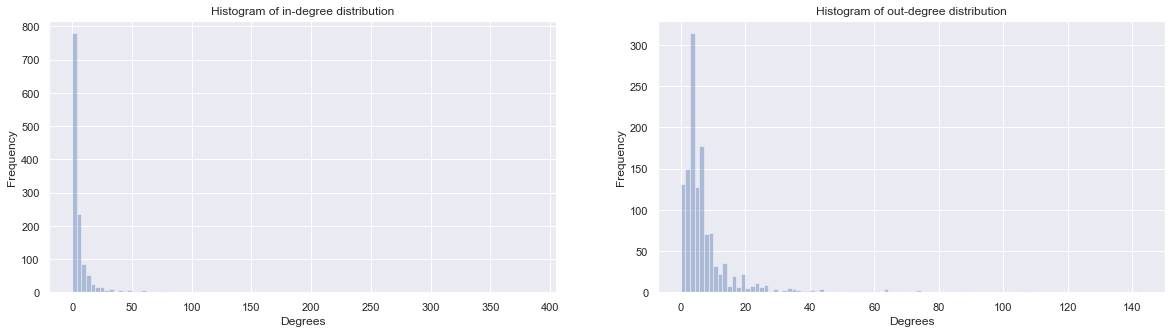

In [25]:
sns.set()

# ignore warnings here
warnings.filterwarnings('ignore')

#-> plot degree distribution
def plot_degree_dist(G, type_degree):
    degrees = [type_degree(n) for n in G.nodes()]
    
    sns.distplot(degrees, bins=100, kde = False) # Here for both distribution, the bins are 100.
    plt.xlabel('Degrees')
    plt.ylabel('Frequency')
    

plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plot_degree_dist(G,G.in_degree)
plt.title('Histogram of in-degree distribution')

plt.subplot(1,2,2)

plot_degree_dist(G,G.out_degree)
plt.title('Histogram of out-degree distribution')

plt.show()

>In the degree distribution plot, the bins are both 100. 'Frequency' is regarded as a y-label here and 'degree' represents how many links between this node and others. To be more specific, the in-degree of a node is the number of links that originate from other nodes and ends up at the current node; the out-degree is the opposite apparently.

>For in-degree distribution, most of the values are distributed between 0 and 50(more exactly, 0 to 20). There are limited nodes with extremely high in-degrees in the network, which means that the tail of this power-law distribution(long-tail distribution) will be pretty long.

>From the figure of out-degree distribution, the conclusion can be obtained that unlike the case of in-degrees, many nodes own non-zero out-degree values. Besides, the variance of out-degree frequency is considerably smaller than that of in-degree one and there aren't many outliers. This result is expected since most of the characters are unimportant supporting roles so that there are some links connecting to important characters but there are few super links pointing to them. That is the reason why only a few nodes(protagonists) own big in-degree while other nodes don't. The difference result of out-degree is because most characters have a story connected with other characters, either with the protagonist or with other supporting characters, and note that the isolated characters have been removed.

#### Network Comparison
> Similar to our former work in assignment 2, our Naruto network would be compared to a ER random network to see whether two networks have something in common. Thus, the degree distributions of two networks would be shown and compared.

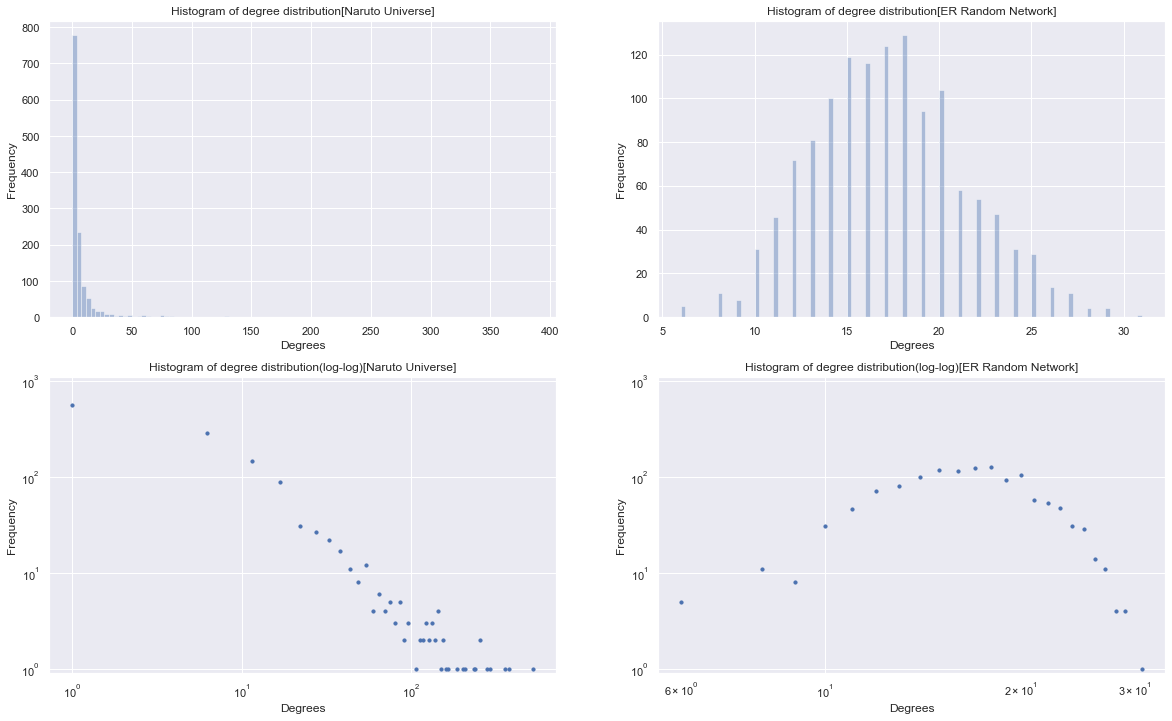

In [26]:
sns.set()
plt.figure(figsize = (20,12))

plt.subplot(2,2,1)
plot_degree_dist(G, G.in_degree)
plt.title('Histogram of degree distribution[Naruto Universe]')

plt.subplot(2,2,2)
degrees = [G.degree(n) for n in G.nodes()]

#-> Calculate probability of connection
p = np.mean(degrees)/(G.number_of_nodes()-1)
G_random = nx.erdos_renyi_graph(G.number_of_nodes(),p)
plot_degree_dist(G_random,G_random.degree)
plt.title('Histogram of degree distribution[ER Random Network]')

plt.subplot(2,2,3)
degrees = [G.degree(n) for n in G.nodes()]
counts,bins = np.histogram(degrees,bins = 100)
ax = plt.gca()
ax.scatter(bins[:-1],counts,s = 10)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(ymin = 0.9)
plt.title('Histogram of degree distribution(log-log)[Naruto Universe]')
plt.xlabel('Degrees')
plt.ylabel('Frequency')

plt.subplot(2,2,4)

degrees = [G_random.degree(n) for n in G_random.nodes()]
counts,bins = np.histogram(degrees,bins = 100)
ax1 = plt.gca()
ax1.scatter(bins[:-1],counts,s = 10)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(ymin = 0.9)
plt.title('Histogram of degree distribution(log-log)[ER Random Network]')
plt.xlabel('Degrees')
plt.ylabel('Frequency')

plt.show()

>For Naruto degree distribution, it looks like power-law distribution. Most nodes have links between 0 and 50 and a few of them have a considerable number of links. This is very similar to the Superhero network we built before. We can draw a conclusion that they belong to the same kind of network, approximately a Scale-free network. The nodes with a high degree of value can be considered as hubs in the network.

>For ER random network, it obeys binominal distribution and can be thought of as Poisson distribution roughly since we have a number of nodes. Most degrees are distributed between 10 and 25.

## 3. Tools, theory and analysis. Describe the process of theory to insight

* **Talk about how you've worked with text, including regular expressions, unicode, etc.**
> I guess we have talked about it in data preprocessing. The text we used was encoded in UTF-8, because of the special characters(such as Japanese) inside. We implemented regular expressions to remove HTML phases and punctuations in the raw text. Plus, for the text from the light novel, we split it into paragraphs.      

* **Describe which network science tools and data analysis strategies you've used, how those network science measures work, and why the tools you've chosen are right for the problem you're solving.**
> Many useful tools would be implemented in our analysis. We plan to talk about them in detail for each task. 

* **How did you use the tools to understand your dataset?**
>We plan to talk about the tools in detail for each task. 

### *Characters Analysis*
>Centrality Measures and Sentiment Analysis would be applied in this section to analyze characters. Centrality measures the importance of a node in a network and sentiment analysis helps us understand the mood contained in texts. Thus, it is expected to find the most important characters and the saddest/happiest characters.

#### Centrality Analysis
> Three centrality measures would be used: **degree centrality**, **betweenness centrality** and **eigenvector centrality**.

> **Degree centrality** calculates the number of links each character has. It is the simplest way to calculate a character’s importance.

> **Betweenness centrality** shows how much a character helps to connect other characters of the network, that are not directly linked. It is the proportion of shortest paths in all paths.  

>**Eigenvector centrality** measures the importance of a character by the number of interactions they have with other important characters.  It's computed by calculating the eigenvector of the adjacent matrix of the network.

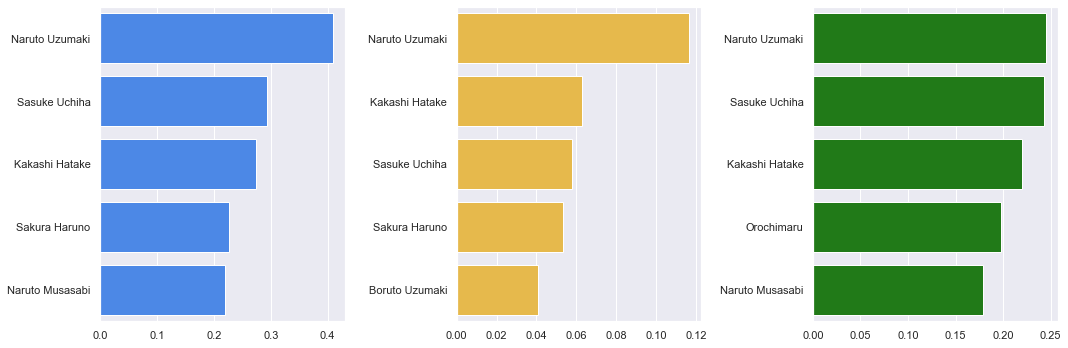

In [27]:
def get_centrality(centrality):
    centarlity_dict = centrality
    return dict(Counter(centarlity_dict).most_common(5))

degree_centrality = get_centrality(nx.degree_centrality(G))
betweenness_centrality = get_centrality(nx.betweenness_centrality(G))
eigenvector_centrality = get_centrality(nx.eigenvector_centrality(G))

fig,axes = plt.subplots(1,3,figsize = (15,5))
centrality_lst = [degree_centrality,betweenness_centrality,eigenvector_centrality]
color = ['#3383FF','#FFC433','#148A08']
for i in range(3):
    sns.barplot(ax = axes[i],x = list(centrality_lst[i].values()),y = list(centrality_lst[i].keys()),color=color[i])
plt.tight_layout()
plt.show()

>Due to different algorithms, each plot is different. But from what we can see in the three charts, the three most important characters are Naruto Uzumaki, Kakashi Hatake, and Sasuke Uchiha who are all the important characters in the series. It's in accordance with the result of the degree ranking we did before, which is just illustrated by **degree centrality**(they are the same stuff). 

>The second figure is based on **betweenness centrality**. It measures how many times a character is found within the shortest path that connects two other characters. For example, **Sakura Haruno** is a hub that connects many other characters and she is also a female protagonist in the comic. 

>The third figure is based on **eigenvector centrality**. A character with many interactions with a few important characters might get a higher score than a character with interactions with a lot of minor characters. **Orochimaro** is the greatest villain in this anime who is linked to many main characters. That's why he has a high score here.

#### Sentiment Analysis
> Each character would be analyzed for their sentiment then the saddest and the happiest character would be presented.

> Sentiment analysis would be used here. It measures the happiness degree reflected by text via scoring each word based on prior knowledge. The higher the score text has, the pleasing the scene it describes.

> Sentiment analysis would definitely help us understand characters better. It's an ideal tool to measure a character's happiness degree.

##### Load Sentiment dataframe

In [28]:
df_sentiment = pd.read_csv('sentiment.txt',sep = '\t')
display(df_sentiment.head(5))

#-> keep our eye on the average happiness
sentiment = defaultdict(lambda : 0)
sentiment.update(zip(df_sentiment['word'].values, df_sentiment['happiness_average'].values))

,word,happiness_rank,happiness_average,happiness_standard_deviation,twitter_rank,google_rank,nyt_rank,lyrics_rank
0,laughter,1,8.50,0.9313,3600,--,--,1728
1,happiness,2,8.44,0.9723,1853,2458,--,1230
2,love,3,8.42,1.1082,25,317,328,23
3,happy,4,8.30,0.9949,65,1372,1313,375
4,laughed,5,8.26,1.1572,3334,3542,--,2332


##### Calcualte Sentiment scores

In [29]:
'''
Note that we abandoned unimportant nodes whose text has less than 500 characters.
We also added a blacklist to filter some words. 
'''

def eval_node_sentiment(node, senti_word=False):
    '''
    input: 
        :(str) node name
        :(bool) senti_word is to decide whether to output sentiment words on the page
    return:
        :(float) average sentiment of the node (single page)
        
    '''
    blacklist = ['page', 'chapter', 'wa', 'also', 'later', 'even','would','able']
    token = text[node]
    token = list(filter(lambda x: x not in blacklist, token))
    senti_token = list(filter(lambda x: x in sentiment.keys(), token))
    
    if len(senti_token)>500:
    
        s = [sentiment[t] for t in senti_token]
    
        if senti_word:
            cnter = Counter(senti_token)
            df = pd.DataFrame({'word': list(cnter.keys()), 
                               'counts': list(cnter.values()), 
                               'sentiment': [sentiment[x] for x in list(cnter.keys())]})
            df = df.sort_values(by=['counts'],ascending=False)
            df.reset_index(drop=True, inplace=True)
            #-> display 5 of the sentiment words
            display(df.head(5))
    
        return np.mean(s)
    else:
        # if there is no words with sentiment
        return np.nan
    
# for each single page, compute page-sentiment
page_sentiment = list(map(eval_node_sentiment,names))


# aggregate in a dataframe
df = pd.DataFrame({'words':  names,'sentiment': page_sentiment})

# drop those without sentiment word
df.dropna(how='any', inplace=True)
df.reset_index(drop=True, inplace=True)
display(df.head(10))

,words,sentiment
0,Demonic Statue of the Outer Path,5.258733
1,Aoba Yamashiro,5.509698
2,Chōza Akimichi,5.522298
3,Chiyo,5.494881
4,Ao,5.283496
5,Bando,5.420704
6,Akatsuchi,5.492960
7,Boro,5.450019
8,Chino,5.420306
9,Danzō Shimura,5.417040


##### Sentiment distribution

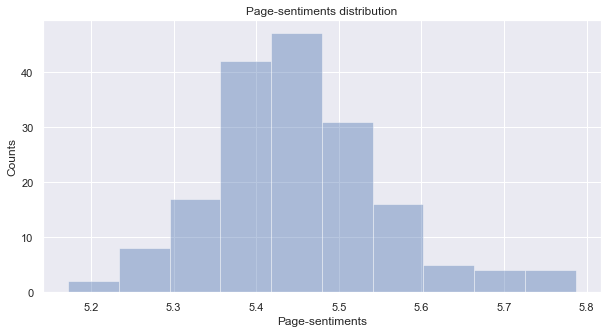

In [30]:
sns.set()
plt.figure(figsize=(10,5))   

sns.distplot(df['sentiment'].values, bins=10, kde = False)
plt.xlabel('Page-sentiments')
plt.ylabel('Counts')
plt.title("Page-sentiments distribution")

plt.show()

> According to our result, most pages have sentiments between 5 and 6. It's noticeable that excluding few pages with extreme sentiments, the page-sentiments roughly obeys Gaussian distribution. And the mean value of the distribution is around 5.45, which is closer to "happy" (with 7-9 sentiments) in sentiment analysis. It's understanable because although wikipedia aims for neutrality, human language has a universal positive bias. In the following analysis we'd like to pay more attention to those extreme values, to learn their stories different from others'.

##### The Happiest Characters

In [31]:
df = df.sort_values(by=['sentiment'],ascending=False)
df.reset_index(drop=True, inplace=True)
display(df.head(5))

,words,sentiment
0,Himawari Uzumaki,5.786766
1,Asura Ōtsutsuki,5.753659
2,Kushina Uzumaki,5.740877
3,Hamura Ōtsutsuki,5.733134
4,Hagoromo Ōtsutsuki,5.722735


In [32]:
# investigate details
_ = eval_node_sentiment('Himawari Uzumaki', True)

,word,counts,sentiment
0,father,26,7.06
1,brother,21,7.22
2,mother,20,7.68
3,home,14,7.14
4,day,13,6.24


#### The Saddest Characters

In [33]:
df = df.sort_values(by=['sentiment'],ascending=True)
df.reset_index(drop=True, inplace=True)
display(df.head(5))

,words,sentiment
0,Hidan,5.172518
1,Gyūki,5.215746
2,Rōshi,5.241013
3,Zabuza Momochi,5.254157
4,Demonic Statue of the Outer Path,5.258733


In [34]:
# investigate details
_ = eval_node_sentiment('Hidan', True)

,word,counts,sentiment
0,opponent,20,3.90
1,kill,17,1.56
2,body,16,5.96
3,despite,13,4.48
4,battle,13,2.98


> The happiest character is **Himawari Uzumaki**. She is the daughter of the hero, Naruto Uzumaki. The most frequent words for her are about her happy family. Since she is only a 10-year old little girl who was born after the world returning to peace (in the end of the story), we have abundant reason to believe that she is the happiest character in Naruto.  

> **Hidan** has the saddest story. He is a bloodthirsty heretic who adores death. His text includes many negative words like 'kill' and 'opponent'. He is a villain killing many ninjas in the manga series. 'kill' is a very sad word in our analysis, but for Hidan, it's his source of happiness. 

### Community Analysis
> In this part, we would use the Louvain method to divide the network into several communities and compare the communities to the real communities in ***Naruto***. In addition, community sentiment would be analyzed via the same way as in the previous task.

#### Community Detection
##### Louvain method
> Louvain method would be implemented here to identify communities. The method is based on the optimization of modularity. When it starts, each node is considered to be a small community. Targeting on optimizing local modularity, the algorithm aggregates small communities with their neighbors into larger ones, until there is no improvement on modularity. 

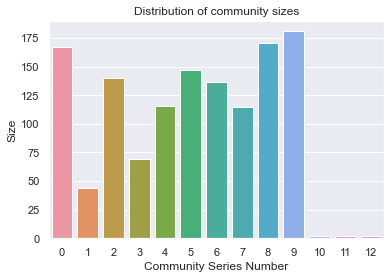

In [35]:
'''
NB: The result of the Louvain method varies each time. To make our output stable, we loaded pre-divided community partitions.
'''
sns.set()
H = G.to_undirected()
#partition = community_louvain.best_partition(H)
res = dict(Counter(partition.values()))
sns.barplot(x= list(res.keys()),y= list(res.values()))
plt.xlabel('Community Series Number')
plt.ylabel('Size')
plt.title('Distribution of community sizes')
plt.show()
plt.show()

##### Take the 10 largest community
> You may notice that some communities have very limited members. In the following analysis, we tend to ignore them. 

In [36]:
community = {n:[k for k in partition.keys() if partition[k] == n] for n in set(partition.values())}
community = community.values()
sorted_partition = sorted(community, key=len,reverse=True) 
chosen_comm = sorted_partition[:10]

##### Name each Community
> Name communities with their three most important members. 

In [37]:
community = {n:[k for k in partition.keys() if partition[k] == n] for n in set(partition.values())}
community = community.values()

def gen_name(c):
    '''
    give name to a community by its three most connected characters
    '''
    tmp = sorted(c, key = H.degree, reverse=True)
    return ' & '.join(tmp[:3])

community_name = list(map(gen_name, chosen_comm))
pd.DataFrame({'Community':community_name})

,Community
0,Boruto Uzumaki & Ino Yamanaka & Shino Aburame
1,Naruto Musasabi & Sakura Haruno & Neji Hyūga
2,Kabuto Yakushi & Gaara & Killer B
3,Sasuke Uchiha & Orochimaru & Itachi Uchiha
4,Shikamaru Nara & Hinata Hyūga & Chōji Akimichi
5,Kakashi Hatake & Tsunade & Anbu Commander
6,Might Guy & Sai & Kankurō
7,Naruto Uzumaki & Iruka Umino & Torune Aburame
8,Jiraiya & Nagato & Hanzō
9,Yamato & Utakata & Chiriku


##### Visualize the Communities

In [38]:
names_community = sum(chosen_comm,[])
largest_cc = max(nx.weakly_connected_components(G.subgraph(names_community)), key=len)
S = G.subgraph(largest_cc.copy())
## undirected network
H = S.to_undirected()

# ##Assign colors to nodes based on different universe
color_map = []
labels = []

color_dict = {'Boruto Uzumaki & Ino Yamanaka & Shino Aburame':'#3383FF',
             'Naruto Musasabi & Sakura Haruno & Neji Hyūga':"#FFC433",
             'Kabuto Yakushi & Gaara & Killer B':'#148A08',
             'Sasuke Uchiha & Orochimaru & Itachi Uchiha':'#A5ABF6',
                'Shikamaru Nara & Hinata Hyūga & Chōji Akimichi':'#FFC50A',
             'Kakashi Hatake & Tsunade & Anbu Commander':'#3FFA64',
             'Might Guy & Sai & Kankurō':'#3FFAEE',
             'Naruto Uzumaki & Iruka Umino & Torune Aburame':'#FA5E3F',
             'Jiraiya & Nagato & Hanzō':'#06FD15',
             'Yamato & Utakata & Chiriku':'#FD06DB'}

for node in H:
    if node in list(community)[0]:
        color_map.append('#3383FF')
        labels.append(community_name[0])
    elif node in list(community)[1]:
        color_map.append("#FFC433")
        labels.append(community_name[1])
    elif node in list(community)[2]:
        color_map.append("#148A08")
        labels.append(community_name[2])
    elif node in list(community)[3]:
        color_map.append("#A5ABF6")
        labels.append(community_name[3])
    
    elif node in list(community)[4]:
        color_map.append("#FFC50A")
        labels.append(community_name[4])
    
    elif node in list(community)[5]:
        color_map.append("#3FFA64")
        labels.append(community_name[5])
    
    elif node in list(community)[6]:
        color_map.append("#3FFAEE")
        labels.append(community_name[6])
    
    elif node in list(community)[7]:
        color_map.append("#FA5E3F")
        labels.append(community_name[7])
        
    elif node in list(community)[8]:
        color_map.append("#06FD15")
        labels.append(community_name[8])
        
    elif node in list(community)[9]:
        color_map.append("#FD06DB")
        labels.append(community_name[9])
        
#     else:
#         color_map.append("#DA092C")
#         labels.append(community_name[10])

# ##Scale node-size according to its degree
node_degree = dict(H.degree())
node_size = [v * 1 for v in node_degree.values()]

100%|██████████| 2000/2000 [00:57<00:00, 34.85it/s]


BarnesHut Approximation  took  10.16  seconds
Repulsion forces  took  44.77  seconds
Gravitational forces  took  0.15  seconds
Attraction forces  took  0.67  seconds
AdjustSpeedAndApplyForces step  took  0.64  seconds


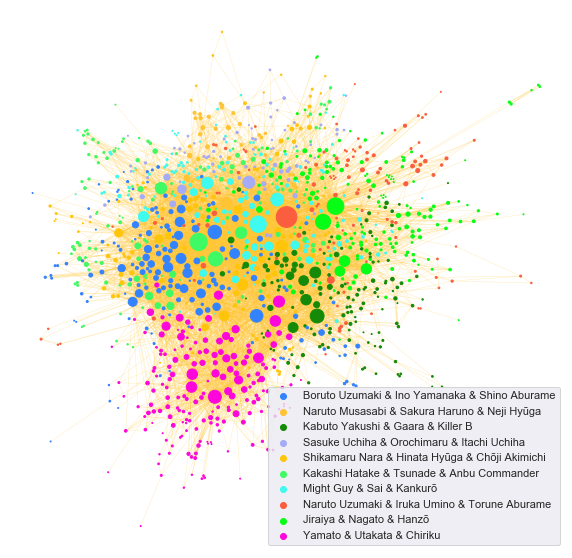

In [621]:
def generate_forceatlas(colormap,H,node_size,color_dict):

    forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=False,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=0.5,

                          # Performance
                          jitterTolerance=0.2,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=0.6,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=5.0,
                          strongGravityMode=False,
                          gravity=1.0,

                          # Log
                          verbose=True)

    positions = forceatlas2.forceatlas2_networkx_layout(H, pos=None, iterations=2000)

    plt.figure(figsize=(10,10))
    nx.draw_networkx_nodes(H, positions, node_size=node_size, node_color=color_map)
    nx.draw_networkx_edges(H, positions, edge_color="#FFC733",alpha = 0.3,width= 0.5)
    
    
    for community,color in color_dict.items():
        
        plt.scatter([],[], c=color, label=community)

    plt.legend()
        
    plt.axis('off')
    plt.show()

generate_forceatlas(color_map,H,node_size,color_dict)

>There are too many communities. Let's have a glance at the three most famous characters we mentioned in the previous analysis, Naruto Uzumaki, Sasuke Uchiha, and Kakashi Hatake. It's noticeable that Sasuke Uchiha and Itachi Uchiha were aligned to the same community: the fact is, they are brothers. It's doubtless that Kakashi Hatake is together with Anbu Commander, actually, he was an Anbu ninja at a young age. Anbu is an organization managing special agents. In Naruto Uzumaki's group, Naruto views Iruka Umino as a mentor, and Iruka in turn, views Naruto as a younger brother. They do have close relationships.     

##### Communities based on node attributes
> What about the communities in fact? First, we divide nodes into communities by the attribute 'village'.

In [66]:
villages = list(np.unique(list((village.values()))))
num_of_village = len(villages)
color_palette = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(num_of_village)]
color_dict = dict(zip(villages,color_palette))

100%|██████████| 2000/2000 [00:51<00:00, 38.53it/s]


BarnesHut Approximation  took  8.93  seconds
Repulsion forces  took  40.69  seconds
Gravitational forces  took  0.14  seconds
Attraction forces  took  0.65  seconds
AdjustSpeedAndApplyForces step  took  0.59  seconds


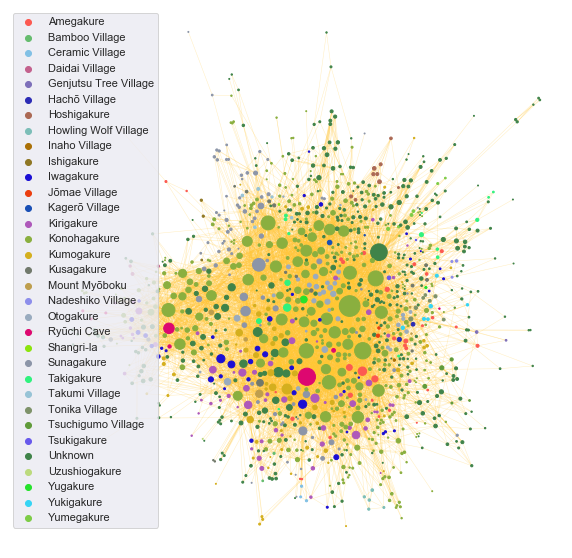

In [623]:
color_map = []
for name in H.nodes:
    name_village = H.nodes[name]['village']
    color_index = villages.index(name_village)
    
    color_map.append(color_palette[color_index])

generate_forceatlas(color_map,H,node_size,color_dict)

> Nearly half of the characters are from **Konohagakure**, where the main characters live. The rest of them are from other villages that don't even belong to any village. It's apparent that the communities we got from the Louvain method are not associated with the character's hometown.

##### Communities based on node attributes
>try another attribute 'grad_age'

In [67]:
ages = list(zip(grad_age.keys(), grad_age.values()))
ages = dict(list(filter(lambda x: not np.isnan(x[1]), ages)))
age_group = np.unique(list(ages.values()))
num_of_grad_ages = len(age_group)
palette = sns.color_palette("tab10",num_of_grad_ages).as_hex()
color_dict = dict(zip(age_group,palette))

100%|██████████| 2000/2000 [00:00<00:00, 6383.03it/s]


BarnesHut Approximation  took  0.06  seconds
Repulsion forces  took  0.15  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.04  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


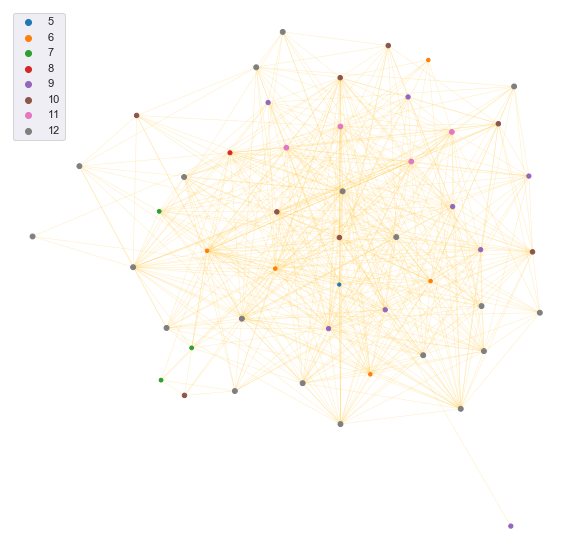

In [625]:
S = G.subgraph(ages.keys())
## undirected network
H = S.to_undirected()

node_size = [v*2 for v in ages.values()]
color_map = []
for name,age in ages.items():
    name_grad_age = ages[name]
    color_index = np.where(age_group == name_grad_age)[0][0]
    color_map.append(palette[color_index])

generate_forceatlas(color_map,H,node_size,color_dict)

> The record is sparse. Most Ninjas graduates when they are more than 10 years old. Only one child graduate at age 5. It would be discussed more in the later section.

#### Community Sentiment Analysis
> In this section, we would analyze the sentiment for each community and find the happiest and saddest communities. In addition, we would explain the reason behind by telling the plots in Naruto. 

> Sentiment analysis would be used again here. 

In [39]:
def eval_sentiment(comm):
    '''
    input: 
        :(str) node name list in a community
    return:
        :(float) average node sentiment of the community
    '''
#     print(comm)
    s = list(map(eval_node_sentiment, comm))
    
    # drop Null values
#     s = s[~np.isnan(s).any(axis=0)]
    s = [x for x in s if str(x) != 'nan']
    return np.mean(s)

# compute community level sentiment
comm_sentiment = list(map(eval_sentiment, chosen_comm))

# # use pandas to show it
df = pd.DataFrame({'community name':community_name, 'sentiment':comm_sentiment})

# # sorting
df = df.sort_values(by=['sentiment'],ascending=False)
df.reset_index(drop=True, inplace=True)
df.head(9)

,community name,sentiment
0,Boruto Uzumaki & Ino Yamanaka & Shino Aburame,5.493311
1,Naruto Uzumaki & Iruka Umino & Torune Aburame,5.488047
2,Naruto Musasabi & Sakura Haruno & Neji Hyūga,5.458969
3,Shikamaru Nara & Hinata Hyūga & Chōji Akimichi,5.456083
4,Yamato & Utakata & Chiriku,5.447440
5,Kabuto Yakushi & Gaara & Killer B,5.440805
6,Kakashi Hatake & Tsunade & Anbu Commander,5.427719
7,Sasuke Uchiha & Orochimaru & Itachi Uchiha,5.426198
8,Might Guy & Sai & Kankurō,5.412243


> First of all, it's noticeable that the sentiment for each community is between 5.4 and 5.5. This can also be explained by the neutrality of Wikipedia. It is still expected to see sentiment variation for the community, although the variance is not big. 

>The happiest community is **Boruto Uzumaki & Ino Yamanaka & Shino Aburame**. Boruto Uzumaki is the son of Naruto Uzumaki. Similar to his sister, the happiest character Himawari Uzumaki, was born at the end of the story and deemed to have a happy childhood. Therefore, it's doubtless that Boruto and his friends are happiest. 

>The saddest community is **Might Guy & Sai & Kankurō**. They are all orphans. Maybe that's the reason behind their sadness.  

### Text Analysis
> We'd like to generate wordclouds for the whole ***Naruto*** world, and for each community. 

> Wordclouds would be generated by TF-IDF to find the highly-frequent words in each community. For the whole world, simple TF would be used (only step1 below). TF-IDF evaluates how relevant a word is to a document in a collection of documents. It works better than simple Ter Frequency, since it considers the word frequency in other documents.   

**Process of creating TF-TR word clouds**
>- *Step1. Find TF(Term Frequency) for each term*<br>
TF computation worked on cleaned Narutopedia texts. We used Counter() to count the number of times that words appear in a document. We denote document as a gather of tokens of characters in a community. Hence we have two documents. To simplify the computation, we applied the original definition of Term Frequency here. That is, the number of times that words appear in a document. 

>- *Step2. Find TF-TR(Term Frequency-Term Ratio) for each term* <br>
Normally, IDF(inverse document frequency) is used to weight TF so as to filter noises. But it can not give us perfect result when there are limited documents. In our case, documents are the collections of text in each community. This is the reason why TR(Term Ratio) should be introduced here. The term ratio can be calculated according to the formulas below:
$$
w_t^m = \frac{TF_t^m}{TF_t^d+c}
$$
<br>
$$
w_t^d = \frac{TF_t^d}{TF_t^m+c}
$$
where $TF_t^m$ means TF of term $t$ in the Marvel universe, and $TF_t^m$ represents TF of term $t$ in the DC universe. $c$ is a constant value preventing the denominator to be 0. 
<br>
The basic idea of TR is to of indicate the ratio of a term's frequency in two documents. Since a term may not appear in both documents, $c$ is introduced. However, in our experiments, $c$ value may affect the final result. Thus $c$ is a hyperparameter in our calculation. After many tries, we determined $c$ to be 25.    
<br>
After calculating TR of each term, we simply multiplied it with TF. Then we stored TF-TR values in a dictionary. 

>- *Step3. Plot the word-cloud figure based on WordCloud module* <br>
After installing the module in the system, the word-cloud can be plotted conveniently. The default background color of a word-cloudis black. We set it to white to make it looks more clear. Using sorted method, we sorted the TF-TR values. According to the documentation of this module, there is a useful method called generate_from_frequencies(), which requires a dictionary as input, telling the frequency of each term. We used the TF-TR dictionary we generated in the last step as input. Then we plotted the word-clouds for each universe and had some comments. 

#### Word Cloud for the whole text

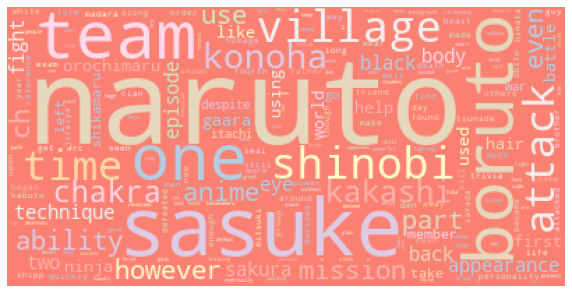

In [40]:
token_lst =  list(text.values())
token_lst = sum(token_lst,[])
black_lst = ['b','chapter','also','page','would','able','could','later','ha','wa']
token = [word for word in token_lst if word not in black_lst]

token_dict = dict(Counter(token))

plt.figure(figsize = (10,10))
wc =WordCloud(background_color='salmon', colormap='Pastel1', collocations=False)
    
wc.generate_from_frequencies(frequencies=token_dict)
plt.imshow(wc)
plt.axis("off")
plt.show()

> The most frequent words are **Naruto**, **Sasuke** and **Boruto**, which are all main characters' names. Naruto Uzumaki and Sasuke Uchiha are the two most famous ninjas in *Naruto*. Boruto Uzumaki is Naruto's son, who is continuing his story in the updating manga series. It is also noticeable that the words **team**, **village** and **attack** are frequently mentioned. They just illustrate the main story of this manga: Team up to attack the villains and protect the village.

#### Word Cloud for each community

In [41]:
community_dict = dict()
for i,name in enumerate(community_name):
    community_dict[name] = chosen_comm[i]
    
community_token = list(map(lambda x: [text[i] for i in x], list(community_dict.values())))
community_token = [sum(community_token[i],[])for i in range(len(community_token))]

##### Calculate tf-idf

In [42]:
def get_tf_dict(token):
    '''
    input: 
        :(list) tokens of a community
    return:
        :(dict) TF value of words in the community   
    '''
    black_lst = ['b','chapter','also','page','would','able','could','later','ha','wa']
    token = [word for word in token if word not in black_lst]
    raw_tf = Counter(token)
    
    
    tf_values = np.array(list(raw_tf.values()))/len(token)
    
    tf_dict = dict(zip(raw_tf.keys(), tf_values))
    
    return tf_dict

naruto_tf = list(map(get_tf_dict, community_token))

In [43]:
N = len(naruto_tf)

#-> compute tf-idf for each word in a community
def get_tf_idf_dict(token, tf_lst):
    '''
    input: 
        :(list) tokens of a community
    return:
        :(dict) TF-IDF value of words in the community   
    '''
    
    
    uniq_token = list(tf_lst.keys())
    tf = list(tf_lst.values())
    
    # the number of documents containing the term
    n_t = list(map(lambda x: len(list(filter(lambda y: x in set(y[0]), community_token))), uniq_token)) # apply set to accelerate the speed
    
    # smooth idf
    idf = np.log(N/(np.array(n_t)+1))+1
    
    tf_idf = tf * idf
    
    tf_idf_dict = list(zip(uniq_token, tf_idf))
    
    # ranking over idf
    tf_idf_dict = dict(sorted(tf_idf_dict, key=operator.itemgetter(1), reverse = True))
    
    return tf_idf_dict

naruto_tf_idf = list(map(get_tf_idf_dict, community_token, naruto_tf))

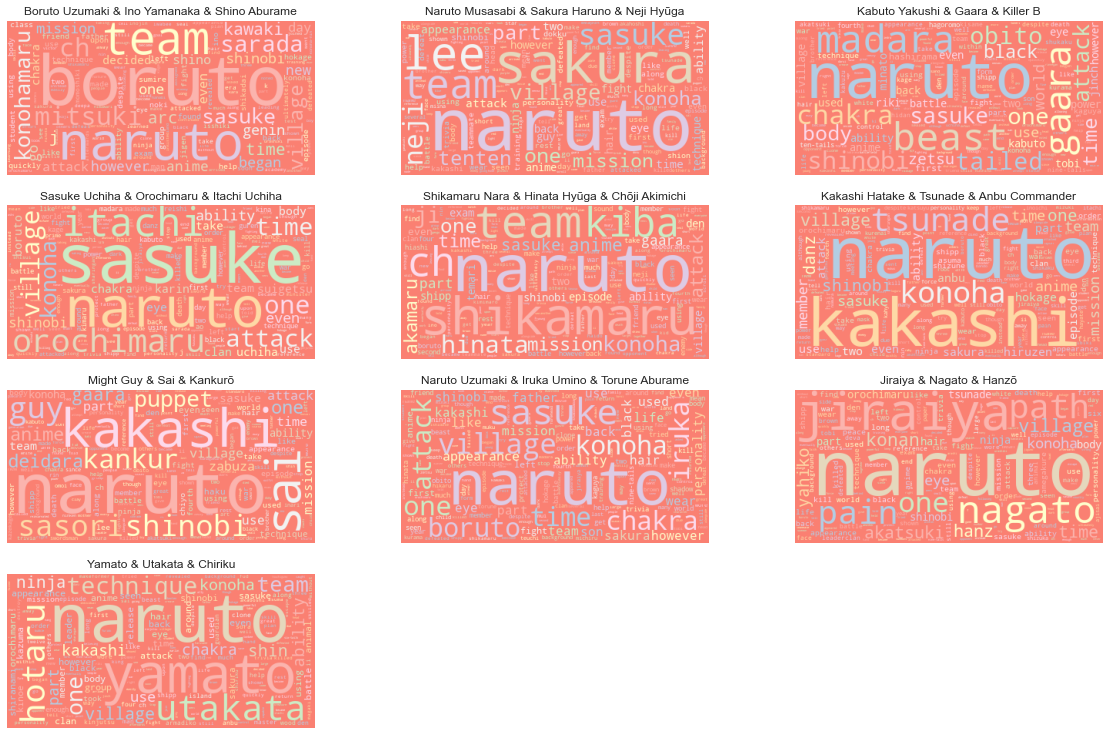

In [51]:
fig, axs = plt.subplots(4, 3, figsize=(20,13))
for i, ax in enumerate(axs.flat):
    if i >= 10:
        break
    
    wordcloud = WordCloud(background_color='salmon', colormap='Pastel1', collocations=False)
    
    wordcloud.generate_from_frequencies(frequencies = naruto_tf_idf[i])
    ax.set_title(list(community_dict.keys())[i])
    ax.imshow(wordcloud)
    ax.axis("off")

fig.delaxes(axs[3][1])
fig.delaxes(axs[3][2])
plt.show()

>  Obviously, they make sense as far as my knowledge is concerned. The word **'Naruto'** shows up in every wordcloud as it is the name of the Anime and also the name of the protagonist. In addition, the name of the characters who have a high degrees in each community shows a great impotance in each wordcloud, such as **'Boruto'** in the first community and **'Sakura'** in the second community. What's more, the Three protagonists **Naruto Uzumaki**, **Sasuke Uchiha** and **Kakashi Hatake** not only appears in their own community, but aslo shows up in other communitys, like **Might Guy & Sai & Kankurō** and **Sakura Haruno & Naruto Musasabi & Neji Hyūga**. It demonstrates their importance to the story.  

### Original Analysis

> In this part, we would raise a lot of interesting guesses in form of questions. During solving the questions, we hope our narration of plots would help you have a glance into the world in *Naruto*. 

#### Question 1: Are geniuses all alone? / Are geniuses changing the world?

>The question may be in a sense not so proper. But in line with our experience, a character's centrality are related to his contribution to the story. Out-degree shows how much one cares about others. In-degree demonstrates one's degree of being noticed. Therefore, to solve this question, we would make an investigation regarding the nodes with young graduation age and their degree and eigenvector centrality.

>In Naruto, at a very young age, each kid in a ninja village would be sent into the Ninja Academy to learn basic ninjutsu (skills to be a ninja). After graduation, they are thought of to be professional ninja. In most cases, talented children would graduate at a very young age.

> Degree and centrality computation, which were described before, would be implemented here. 

There are 49 nodes with valid grad_age attribute. 


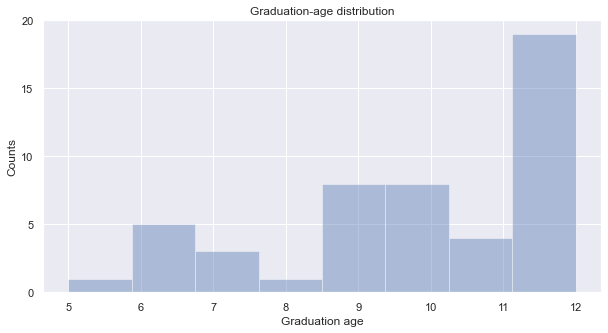

In [74]:
# Let's first have a glance at the graduation age

# remove null values
ages = list(zip(grad_age.keys(), grad_age.values()))
ages = dict(list(filter(lambda x: not np.isnan(x[1]), ages)))

# distribution
age_stat = Counter(ages.values())
print('There are {} nodes with valid grad_age attribute. '.format(len(ages)))

sns.set()
plt.figure(figsize=(10,5))   

sns.distplot(list(ages.values()), bins=len(age_stat), kde = False)
plt.yticks([0, 5, 10, 15, 20])
plt.xlabel('Graduation age')
plt.ylabel('Counts')
plt.title("Graduation-age distribution")

plt.show()

> It's a pity that most ninjas don't have record of graduation age. As can be seen from the figure, most ninjas graduated at 12 (we stated before Naruto Uzumaki graduated at 12, thus he is not born with talent). Only a few real geniuses became professional ninjas before their 9th birthday. In the following analysis, we would have a look at them.

In [75]:
# pick out geniuses
ages = list(zip(ages.keys(), ages.values()))
ages = list(filter(lambda x: x[1]<9, ages))
ages = dict(list(sorted(ages, key=lambda x: x[1])))

# fetch degree
genius_in_degree = list(map(lambda x: G.in_degree(x), ages.keys()))
genius_out_degree = list(map(lambda x: G.out_degree(x), ages.keys()))
# eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

genius_cent = list(map(lambda x: eigenvector_centrality[x], ages.keys()))
genius = pd.DataFrame({'Name':list(ages.keys()), 
                       'Graduation age': list(ages.values()), 
                       'In-Degree':genius_in_degree,
                       'Out-Degree':genius_out_degree,                       
                       'Eigenvector centrality':genius_cent})
display(genius)

,Name,Graduation age,In-Degree,Out-Degree,Eigenvector centrality
0,Kakashi Hatake,5,247,108,0.220451
1,Jiraiya,6,128,58,0.132034
2,Orochimaru,6,194,65,0.197742
3,Naruto Musasabi,6,276,8,0.178412
4,Tsunade,6,143,60,0.136061
5,Yamato,6,65,55,0.098044
6,Itachi Uchiha,7,117,41,0.129140
7,Might Guy,7,103,64,0.117126
8,Sasori,7,57,31,0.072870
9,Baki,8,13,20,0.026534


> Most geniuses played important roles in the story. Some characters, such as Kakashi Hatake(supervisor of Naruto Uzumaki) and Itachi Uchiha(Sasuke Uchiha's brother) have greatly promoted the development of the plot. 

>It's very funny that Naruto Musasabi, a fictional character, has a high eigrnvector centrality. Naruto Musasabi is the hero in a novel authored by Naruto Uzumaki's godfather Jiraiya. Thus, Naruto Musasabi has a really low out-degree: he shouldn;t have any real connections with other characters. We guess his high centrality may be due to the popularity of Jiraiya's novel.    

>As for others' social relationship, it varies over individuals. Kakashi Hatake has many friends while Baki is a real genius, but with little attention (low in-degree). In all, excluding exceptions, in the usual case, being a genius doesn't bring loneliness.

#### Question 2: Ninjas from which village are the saddest?

> As indicated in the background, there are many countries in *Naruto*. Each country built a ninja village to train ninjas as military forces. In the following narration, for the sake of simplification, we would use 'country' and 'village' as synonymous.  

>The dog-eat-dog world in *Naruto* is cruel and filled with tragedy. For the sake of state benefits, there are wars between countries at irregular intervals. The five greatest countries, Konohagakure, Kirigakure, Kumogakure, Iwagakure, and Sunagakure tried to build an international order to keep peace many times, but all failed because of their own conspiracy.

>***War is the seed of tragedy, spreading death, sadness, and hatred into every corner of the world.*** Great countries tend to choose small villages as their battlefield, involving more innocent people in the bloody war. One of the most powerful villains in *Naruto*, Nagato,  comes from such a small village, he destroyed the hometown of Naruto Uzumaki, for revenge. In short, the world is stuck in a circle of avenge and revenge. 

>Both the villains and heroes aim at bringing peace back to the world. Villains plan to become the power above all to eliminate all the unstable factors. Heroes know that the length of peace kept by force would be the length of the ruler's life. It's not a long-term plan. Thus they determine to unite the world by love.  

>In this question, we would like to find out the village with the most tragedy. Our guess would be Amegakure, Nagato's hometown. As a small village between three great countries, it has frequently served as a battleground during the various ninja wars, making most of its population war refugees.

> Sentiment analysis would be used again here. In addition, to look more into the most tragic village, we would count the word frequency and draw a wordcloud. 

In [76]:
# gather text for each village
village_text = {}
village_names = list(set(village.values()))
village_names.pop(village_names.index('Unknown'))
for v in village_names:
    tmp = list(zip(village.keys(), village.values()))
    tmp = list(filter(lambda x: v==x[1], tmp))
    tmp = dict(tmp)
    t = list(tmp.keys())
    t = list(map(lambda x: text[x], t))
    village_text[v] = sum(t, [])

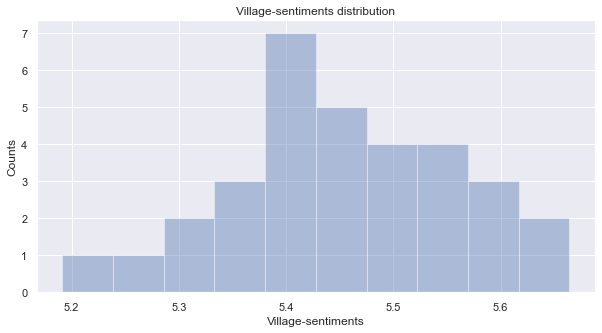

,Village,Sentiment
0,Yugakure,5.191124
1,Ishigakure,5.278589
2,Shangri-la,5.306823
3,Howling Wolf Village,5.324129
4,Kumogakure,5.367670
5,Inaho Village,5.370526
6,Kirigakure,5.371250
7,Hachō Village,5.381889
8,Otogakure,5.382291
9,Amegakure,5.394168


In [79]:
# rewrite the function we implemented before, to calculate sentiment, now we removed the word number limit
def eval_village_sentiment(v, senti_word=False):
    '''
    input: 
        :(str) village name
        :(bool) senti_word is to decide whether to output sentiment words on the page
    return:
        :(float) average sentiment of the node (single page)
        
    '''
    blacklist = ['page', 'chapter', 'wa', 'also', 'later', 'even','would','able', 'j', 'k', 'b', 'ch']
    token = village_text[v]
    token = list(filter(lambda x: x not in blacklist, token))
    senti_token = list(filter(lambda x: x in sentiment.keys(), token))
    
    if len(senti_token):
    
        s = [sentiment[t] for t in senti_token]
    
        if senti_word:
            cnter = Counter(senti_token)
            df = pd.DataFrame({'word': list(cnter.keys()), 
                               'counts': list(cnter.values()), 
                               'sentiment': [sentiment[x] for x in list(cnter.keys())]})
            df = df.sort_values(by=['counts'],ascending=False)
            df.reset_index(drop=True, inplace=True)
            #-> display 5 of the sentiment words
            display(df.head(5))
    
        return np.mean(s)
    else:
        # if there is no words with sentiment
        return np.nan

village_sentiment = list(map(eval_village_sentiment, village_names))
village_sentiment = list(zip(village_names, village_sentiment))
village_sentiment = list(sorted(village_sentiment, key=lambda x: x[1]))

# aggregate in a dataframe
df = pd.DataFrame({'Village':  list(dict(village_sentiment).keys()),'Sentiment': list(dict(village_sentiment).values())})

# drop those without sentiment word
df.dropna(how='any', inplace=True)
df.reset_index(drop=True, inplace=True)


# display the sentiment distribution
sns.set()
plt.figure(figsize=(10,5))   


sns.distplot(list(df['Sentiment']), bins=10, kde = False)
plt.xlabel('Village-sentiments')
plt.ylabel('Counts')
plt.title("Village-sentiments distribution")

plt.show()
display(df)

> Let's first have a look at the 5 great countries. Born in the 5 great villages, Konohagakure, Kirigakure, Kumogakure, Sunagakure, and Iwagakure usually doesn't mean a relatively safe environment to grow up in. Great countries could also be destroyed easily by wars. For example, the man we mentioned before, Nagato, destroyed the whole Konohagakure and almost killed everyone. Many familiar names came to an end during this battle, such as Kakashi Hatake. Fortunately, he was convinced by Naruto Uzumaki in the end and resurrect everyone at the cost of his life. 

In [80]:
# look into details
# Iwagakure: with the saddest villager in the 5 great countries
_ = eval_village_sentiment('Kumogakure', True)

# Kirigakure: with the happiest villager in the 5 great countries
_ = eval_village_sentiment('Konohagakure', True)

,word,counts,sentiment
0,beast,218,3.36
1,ha,155,6.00
2,attack,145,2.42
3,one,121,5.40
4,war,107,1.80


,word,counts,sentiment
0,team,1926,6.26
1,ha,1735,6.00
2,time,1272,5.74
3,one,1268,5.40
4,village,1257,6.28


> We noticed that beast appeared frequently in Kumogakure's text. Tailed beasts are 9 powerful monsters in *Naruto*. They were sealed in 9 human bodies(jinchūriki) in the five great countries. When a jinchūriki loses control of his/her tailed beast, the consequence would be disastrous: an out-of-control tailed beast would destroy everything until some powerful ninja stops it and seals it again. Therefore, the tailed beast may be the vital reason for the sadness in Kumogakure. Konohagakure is the most powerful village in the world and it's the hometown of the main characters. That's why Konohagakure is the happiest village among the great-5. 

In [81]:
# Yugakure: the hometown of the saddest villagers
_ = eval_village_sentiment('Yugakure', True)

,word,counts,sentiment
0,opponent,20,3.90
1,kill,18,1.56
2,body,16,5.96
3,despite,13,4.48
4,battle,13,2.98


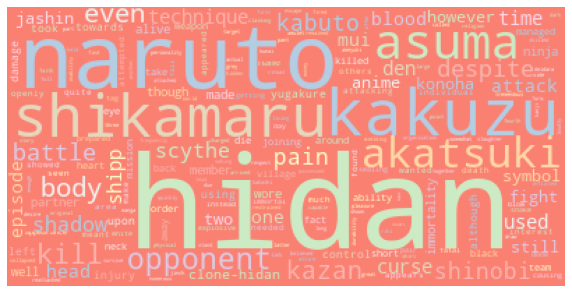

In [86]:
# the world cloud of Yugakure
token_lst =  village_text['Yugakure']
black_lst = ['b','chapter','also','page','would','able','could','later','ha','wa']
token = [word for word in token_lst if word not in black_lst]

token_dict = dict(Counter(token))

plt.figure(figsize = (10,10))
wc =WordCloud(background_color='salmon', colormap='Pastel1', collocations=False)

wc.generate_from_frequencies(frequencies=token_dict)

plt.imshow(wc)
plt.axis("off")
plt.show()

> Ninjas from Yugakure are saddest. Actually, the saddest character, Hidan, is from Yugakure. Ironically, Yugakure is a small village which has strong inclinations towards pacifism. Ideally, it ought to be the happiest village in the world. However, Yugakure's transformation from a military force was not supported by all, Hidan being a notable objector. He slaughtered many villagers and left the village. Hidan has a very negative influence on the sentiment of Yugakure. 

> 'curse', 'pain', 'battle', 'kill' filled Yugakure's word cloud. It's not hard to imagine the villagers' situation. 

##### Apart from the saddest, let's see one of the happiest. 
> Although the score of Nadeshiko Village is better, here we would analyze Mount Myōboku. The two villages are similar but Mount Myōboku is more typical and easier to prove our final conclusion. 

In [89]:
# Mount Myōboku	: the hometown of the happiest villagers
_ = eval_village_sentiment('Mount Myōboku', True)

,word,counts,sentiment
0,power,45,6.68
1,brother,32,7.22
2,mother,31,7.68
3,ability,29,6.68
4,world,29,6.52


> Residents in Mount Myōboku are in good mood. Actually, Mount Myōboku is one of the big three unexplored sage regions, which is far away from the continent full of wars and kills. Therefore, it's doubtless that the root of sadness in ***Naruto***'s world is war. 

##### Conclusion
> **WAR IS CRUEL**. In the world in *Naruto*, no matter great or small villages, they all face the pressure of war every day. It's so ironic that villagers in Yugakure, who love peace the most, are through the worst. We are supposed to cherish the peaceful time which got through difficult struggles: war has never been far away from us. 

#### Additional question: Which great country is the most crazy about war?
> Regarding our finding in question 2, there is still something misty: since residents in great countries also hurt in war, then which country keeps spreading war everywhere? Considering that only the 5 great countries have the ability to raise large-scale war, the suspects are limited to the great-5. We guess term frequency would give us the answer. Note that here we would use the term frequency adjusted for document length. Document here is denoted as the gather of text of characters from a village. The equation goes like:
$$
TF(t,d) = \frac{f_{t,d}}{N_d}
$$
where $t$ is a term and $d$ is the document it belongs to. $f_{t,d}$ represents the counts of $t$ in $d$. $N_d$ means number of words in $d$.   

>More specifically, we would count the number of word 'war' in each document.  

In [99]:
war_crazy = []
greats = ['Konohagakure', 'Kirigakure', 'Kumogakure', 'Sunagakure', 'Iwagakure']
for v in greats:
    t = village_text[v]
    c = Counter(t)
    war_crazy.append((c['war'])/len(t))

war_crazy = list(zip(greats, war_crazy))
war_crazy = list(sorted(war_crazy, key=lambda x: x[1], reverse=True))
war_crazy = dict(war_crazy)

df = pd.DataFrame({'Village':list(war_crazy.keys()), 'TF': list(war_crazy.values())})

display(df)

,Village,TF
0,Kumogakure,0.003790
1,Iwagakure,0.002942
2,Kirigakure,0.002936
3,Konohagakure,0.001865
4,Sunagakure,0.001683


> Residents in Kumogakure are very crazy about war. In the manga series, after a world war, while a peace treaty was formed between all the villages to reduce the sizes of their forces, Kumogakure secretly does not honour to the agreement, seeing this as a chance to leap over other countries. This can be a proof.  

#### Question 3: Novel Analysis: Sasuke's sentiment change over paragraphs?

> Let's have a glance at the light novel ***Sasuke Shinden: The Teacher's Star Pupil***. It's fanfiction thus the information it gives may more or less reflect the ideas from fans. To start, we would simply compute the hero Saseke's sentiment change over paragraphs. 

> Sentiment analysis is again used here. 

In [102]:
# rewrite the function we implemented before, to calculate sentiment
def eval_paras_sentiment(token, senti_word=False):
    '''
    input: 
        :(list) token
        :(bool) senti_word is to decide whether to output sentiment words on the page
    return:
        :(float) average sentiment of the node (single page)
        
    '''
    blacklist = ['page', 'chapter', 'wa', 'also', 'later', 'even','would','able', 'j', 'k', 'b', 'ch']
    token = list(filter(lambda x: x not in blacklist, token))
    senti_token = list(filter(lambda x: x in sentiment.keys(), token))
    
    if len(senti_token):
    
        s = [sentiment[t] for t in senti_token]
    
        if senti_word:
            cnter = Counter(senti_token)
            df = pd.DataFrame({'word': list(cnter.keys()), 
                               'counts': list(cnter.values()), 
                               'sentiment': [sentiment[x] for x in list(cnter.keys())]})
            df = df.sort_values(by=['counts'],ascending=False)
            df.reset_index(drop=True, inplace=True)
            #-> display 5 of the sentiment words
            display(df.head(5))
    
        return np.mean(s)
    else:
        # if there is no words with sentiment
        return np.nan
paras_sentiment = list(map(eval_paras_sentiment, paras))

# remove nan
paras_sentiment_new = [i for i in paras_sentiment if not np.isnan(i)]

# the sentiment of the whole novel
novel_sentiment = eval_paras_sentiment(sum(paras, []))
print('The average sentiment of the whole novel is ', novel_sentiment)

The average sentiment of the whole novel is  5.472253760999148


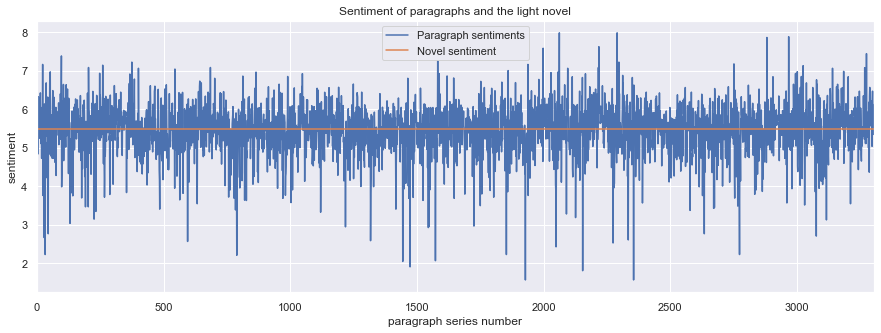

In [103]:
sns.set()
plt.figure(figsize=(15, 5))
sns.lineplot(x=range(len(paras_sentiment_new)), y=paras_sentiment_new)
sns.lineplot(x=[0,len(paras_sentiment_new)], y=[novel_sentiment, novel_sentiment])
plt.legend(['Paragraph sentiments', 'Novel sentiment'])
plt.title('Sentiment of paragraphs and the light novel')
plt.xlabel('paragraph series number')
plt.ylabel('sentiment')
plt.xlim(0, len(paras_sentiment_new))
plt.show()

> Even with much fluctuation, most paragraphs have sentiment around 5.5, approximately the average sentiment of the novel. As we can see, with the development of the story, the sentiment declines sharply many times but returns to the normal values soon. In line with the graph, we guess that the climax of the story is around paragraph 1900 to 2400, where the sentiment fluctuates the most.  

#### Question 4: Novel Analysis: Sasuke's Character Pairing

>Sasuke Uchiha is one of the main characters in ***Naruto*** and the hero in ***Sasuke Shinden: The Teacher's Star Pupil***. In this part, we expect more from the light novel: in the author's view, who is Sasuke's character pairing? [Character Pairing](https://fanlore.org/wiki/CP_Fan#:~:text=A%20cp%20fan%20is%20a%20fan%20of%20a%20couple.&text=CP%20fans%20are%20often%20at,anime%2Fcomics%2Fgaming%20fandom.), also known as CP, is an important part of the ACG culture. Pairing refers to the characters who make up the romantic focus of a fanfiction. But they don't need to be factual couples. For example, Naruto Uzumaki is sometimes regarded as Sasuke Uchiha's CP, even though they are only comrades.    
Here we assume that rather than with others, when staying with his CP, Sasuke is more pleased. **Therefore, this question would become finding paragraphs containing character names, and compare the corresponding sentiments.**

>There are too many characters in Naruto. It's time-consuming to loop over all the character names in the novel. Therefore, according to our investigation, we would like to list 4 potential candidates here: Naruto Uzumaki, Itachi Uchiha, Sakura Haruno and Karin. Naruto Uzumaki is Sasuke's closest comrade and they have common ideals. Itachi Uchiha is Sasuke's brother and the one who supports him the most. Sakura Haruno is Sasuke's wife and they have a daughter. Karin is Sasuke's teammate and she has loved Sasuke at a distance for many years.

> First let's make clear who has the most stories with Sasuke in the manga series. This may give us some hints on the anwer for this question. Term frequency would be used here, to analyze character pages. 

#### In-TF
> Considering the length of different page content, term frequency with adjustment would be implemented. We define In-TF here to be the frequency of the word 'sasuke' on each candidates' page. In-TF reflects the candidate's affection for Sasuke.   

In [106]:
options_full = ['Naruto Uzumaki', 'Itachi Uchiha', 'Sakura Haruno', 'Karin']

# In-TF
tf_in = {}
for o in options_full:
    t = text[o]
    tmp = Counter(t)
    tf_in[o] = tmp['sasuke']/len(t)

tf_in = list(zip(tf_in.keys(), tf_in.values()))
tf_in = list(sorted(tf_in, key=lambda x: x[1], reverse=True))
tf_in = dict(tf_in)

df = pd.DataFrame({'Candidate':list(tf_in.keys()), 'In-TF': list(tf_in.values())})

display(df)

,Candidate,In-TF
0,Karin,0.040125
1,Itachi Uchiha,0.030886
2,Sakura Haruno,0.027374
3,Naruto Uzumaki,0.016525


> In-TF here shows the degree of character's "love" to Sasuke. It's clear that Karin is devoted to Sasuke. Regarding In-TF, Naruto Uzumaki seems to be the most impossible candidate. 

#### Out-TF
> Original term frequency would be implemented here. It's not necessary to apply term frequency with adjustment because the denominator would be the same. We define Out-TF here to be the frequency of a candidate's name on Sasuke' page. Out-TF reflects Sasuke's affection for the candidate in a sense. 

In [108]:
# Out-TF
options = ['naruto', 'itachi', 'sakura', 'karin']
page = text['Sasuke Uchiha']
tf_out = {}
tmp = Counter(page)
for o in options:
    tf_out[o] = tmp[o]

tf_out = list(zip(tf_out.keys(), tf_out.values()))
tf_out = list(sorted(tf_out, key=lambda x: x[1], reverse=True))
tf_out = dict(tf_out)

df = pd.DataFrame({'Candidate':list(tf_out.keys()), 'Out-TF': list(tf_out.values())})

display(df)

,Candidate,Out-TF
0,naruto,400
1,itachi,188
2,sakura,94
3,karin,17


> Things become different. Naruto is the one with the highest probability to be CP, according to the analysis. Surprisingly, Sasuke doesn't seem to care much about Karin. Her affection is doubtless unrequited.

> In line with the analysis results above, we would like a make a guess that **Itachi Uchiha** is the most possible CP of Sasuke. Our guess is based on the fact that Itachi has a relatively high ranking in both In-TF and Out-TF.  

#### What would be the novel author's preference?
> As a fan, the author's choice of CP is hidden in the novel text, even though he/she may be not intended to do that. With the help of sentiment analysis, we are expected to dig out the hidden information: the author's preference for Sasuke's CP.  

> First, for each candidate, we would gather the words from all paragraphs containing his or her name. For the 4 candidates, 4 such documents would be generated. Then, sentiment analysis would be applied over the documents.  

In [109]:
def fetchParas(ch):
    '''
    collect the words in all paragraphs containing ch
    ch: character name
    '''
    tmp = []
    for p in paras:
        if ch in p:
            tmp.append(p)
    return sum(tmp, [])

focus_paras = [fetchParas(o) for o in options]
option_sentiment = list(map(eval_paras_sentiment, focus_paras))
option_sentiment = list(zip(options_full, option_sentiment))
option_sentiment = list(sorted(option_sentiment, key=lambda x: x[1], reverse=True))
option_sentiment = dict(option_sentiment)

df = pd.DataFrame({'Candidate': list(option_sentiment.keys()),'Sentiment': list(option_sentiment.values())})
display(df)

,Candidate,Sentiment
0,Naruto Uzumaki,5.546862
1,Sakura Haruno,5.534066
2,Itachi Uchiha,5.487603
3,Karin,5.328333


> Different from our guess, in the author's eyes, Naruto Uzumaki and Sakura Haruno have a higher probability to be Sasuke's CP. They have close scores. Karin gets the lowest score. She scored significantly lower than everyone else. Sad story T_T.

## 4. Discussion. Think critically about your creation

* #### What went well?
>* We analyzed degree distribution of the Naruto network, and proved that it is  scale-free network. 
>* We used sentiment analysis and centrality measures to analyze characters: the saddest/happiest characters and the importance of the characters. Our result is in accordance with the fact. 
>* We analyzed the text that was crawled from the characters' pages and plotted word clouds. The word clouds matched the content of the manga series. 
>* We made many interesting guesses based on Narutopedia pages and a light novel. We are able to draw meaningful conclusions from the results. 

* #### What is still missing?
>* Due to the limitations of the text resources, we didn't make a dynamic network with new nodes coming in and old nodes disappearing. The whole analysis is based on the static network which was built on the information from [Fandom](https://www.fandom.com/). The further study could be improved through building a dynamic network. It could show how the network changes with storylines and how the character changes from a good person to a villain.
> * Further investigation could be made over the light novels.
> * More node attributes could be crawled and exploited. 
> * We focused on only one social network. It would be better if we could introduce one more network and exploit more information via tieing them together. 

* #### What could be improved?, Why?
>* We adopted Louvain method to detect communities so as to calucalte the sentiment for each community. However, the result we got is not convincing compared with facts. We believe that by implementing other methods (such as GN method), we would be able to improve the result. 
>* It would be better if we could build an ideal scale-free network and compare it with our network. 
>* We noticed that the attribute 'grad_age' has too many null values. It could be improved. The information would be more completed if we could gather information from other websites. 

## 5. Contributions.Who did what?

|Name|Project Distribution|
|--|-------------------------------|
|Chao Yu (s200079) |Motivation, Character Analysis, Community Analysis, Text Analysis, Discussion|
|Caining Liu (s192146)|Network generation, Data Acquisition, Network Analysis, Writing the web page|
|Manxi Lin (s192230)|Background, Motivation, Data Acquisition, Original Analysis, Discussion, Finishing touches|